In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("Marketing Insight.csv").drop(25285)
df

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,fv,mkt,sector
0,2,1991,34.150,12.901,6.133,-4.760,40.661,93.641594,0.848000,1.94200,2.556972,13.551000,1
1,2,1992,100.190,73.684,5.239,5.642,54.998,63.700230,0.880000,2.46900,1.125155,20.593000,1
2,2,1993,89.988,73.488,13.044,7.724,69.560,49.590862,1.168000,4.79100,1.165176,26.938999,1
3,2,1994,89.778,72.782,13.605,6.720,68.097,53.476501,1.503000,4.78300,1.190308,24.464001,1
4,3,1990,6.130,1.790,0.796,0.805,7.388,1.752816,0.009000,0.20600,0.536348,1.611000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29884,4756,2015,8092.460,2040.375,-294.039,-524.499,4046.025,31543.314000,58.299999,717.90002,4.153050,863.932010,1
29885,4756,2016,22664.076,6053.860,301.459,-123.829,7000.132,34523.969000,48.000000,834.40802,1.771307,1362.489000,1
29886,4756,2017,28655.372,9486.248,70.917,-60.654,11758.751,52554.945000,66.500000,1378.07300,2.203613,2343.000000,1
29887,4756,2018,29739.614,9454.055,1634.946,2097.802,21461.268,57442.277000,70.000000,1473.63400,2.306088,2751.227100,1


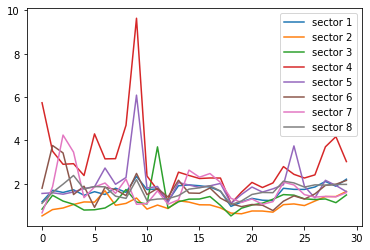

In [4]:
for i in range(1,9):
    data = df[df["sector"] == i]
    means = []
    for j in range(1990, 2020):
        year_data = data[data["year"] == j]["fv"]
        means.append(np.mean(year_data))
    plt.plot(means, label = f"sector {i}")
    plt.legend()

In [24]:
data = df[df["sector"] == 6][df["year"] > 2013]
X, y = data.iloc[:, :10].join(data.iloc[:, 11:]), data["sales"]

<ipython-input-24-70098f9662e5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df[df["sector"] == 6][df["year"] > 2013]


<AxesSubplot:>

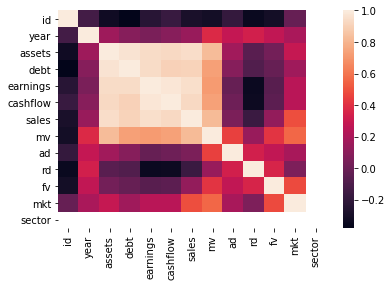

In [35]:
corr_mat = data.corr()
sns.heatmap(corr_mat, 
        xticklabels=corr_mat.columns,
        yticklabels=corr_mat.columns)

In [32]:
results = smf.mixedlm(f"sales ~ cashflow", data, groups = X["cashflow"]).fit()
results.summary()

C:\Users\frain\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:             MixedLM Dependent Variable: sales     
No. Observations:  68      Method:             REML      
No. Groups:        68      Scale:              79159.4404
Min. group size:   1       Log-Likelihood:     -498.1605 
Max. group size:   1       Converged:          Yes       
Mean group size:   1.0                                   
---------------------------------------------------------
            Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   261.870    7.657 34.202 0.000 246.864 276.877
cashflow      5.452    0.237 23.004 0.000   4.988   5.917
Group Var 79159.440                                      
=========================================================

"""